# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


For this scenario where it is more important to correctly classify the claims, it is preferable to have False Positives than False Negatives because of the implications of missclasifying a claim on a harmful video as an opinion, thus the best metric for evaluating the model is Recall.

**Modeling workflow and model selection process**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pickle
# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Import packages for data modeling
### YOUR CODE HERE ###
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe(include = 'all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data_subset = data.copy()
data_subset = data_subset.dropna(axis = 0).reset_index(drop = True)

In [10]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
data_subset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
data_subset = data_subset.drop_duplicates().reset_index(drop = True)

Check for and handle outliers.

<Axes: ylabel='video_view_count'>

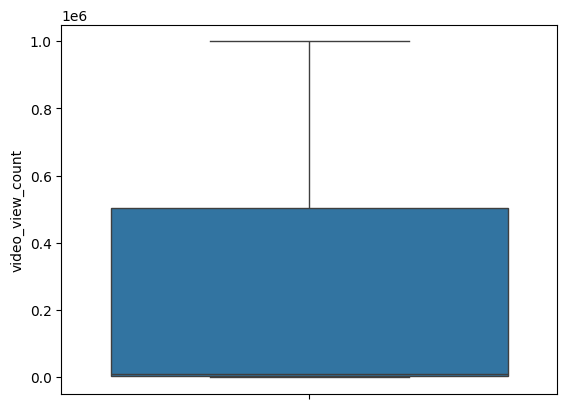

In [12]:
### YOUR CODE HERE ###
sns.boxplot(data_subset['video_view_count'])

<Axes: ylabel='video_like_count'>

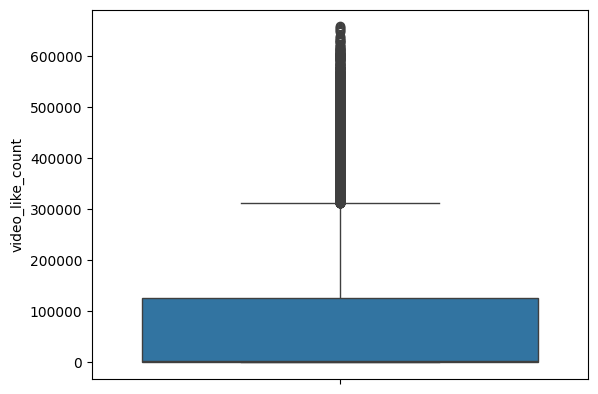

In [13]:
sns.boxplot(data_subset['video_like_count'])

<Axes: ylabel='video_share_count'>

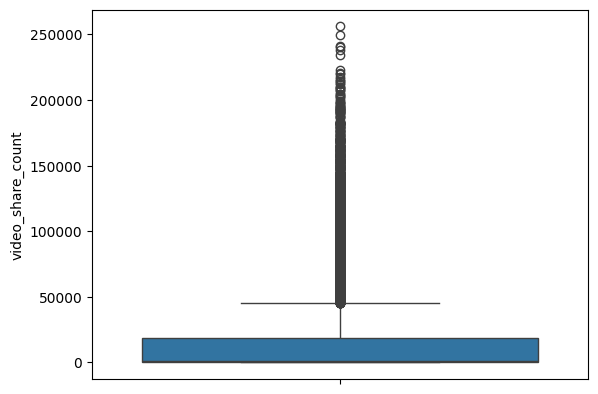

In [14]:
sns.boxplot(data_subset['video_share_count'])

<Axes: ylabel='video_download_count'>

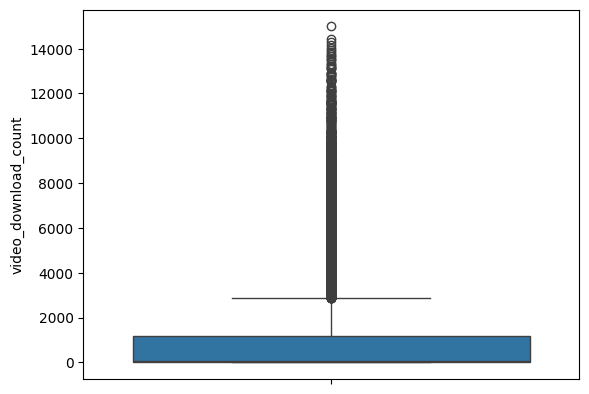

In [15]:
sns.boxplot(data_subset['video_download_count'])

<Axes: ylabel='video_comment_count'>

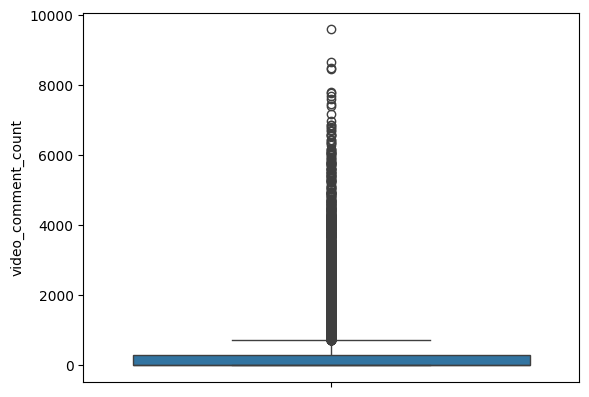

In [16]:
sns.boxplot(data_subset['video_comment_count'])

In [17]:
#sns.pairplot(data_subset)

In [18]:
#q1 = data_subset['video_share_count'].quantile(0.25)
#q3 = data_subset['video_share_count'].quantile(0.75)

#iqr = q3 - q1

#upper_limit = q3 + (iqr * 1.5)

In [19]:
data_clean = data_subset.copy()

In [20]:
data_clean.shape

(19084, 12)

Check class balance.

In [21]:
# Check class balance
### YOUR CODE HERE ###
data_clean['claim_status'].value_counts(normalize = True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [22]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data_clean['video_text_length'] = data_clean['video_transcription_text'].fillna('').str.len()

In [23]:
data_clean.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [24]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
claims = data_clean[data_clean['claim_status'] == 'claim']
opinions = data_clean[data_clean['claim_status'] == 'opinion']

c_text_mean = claims['video_text_length'].mean()
o_text_mean = opinions['video_text_length'].mean()
print(f'Claims text length mean: {c_text_mean}')
print(f'Opinions text length mean: {o_text_mean}')

Claims text length mean: 95.37697751873439
Opinions text length mean: 82.72256226255804


Visualize the distribution of `text_length` for claims and opinions.

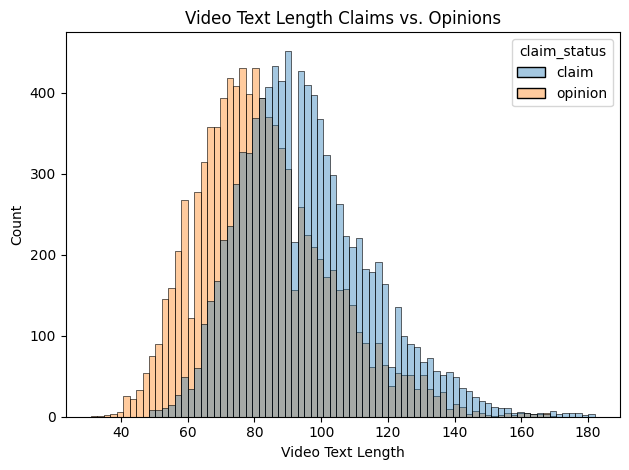

In [25]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
fig = sns.histplot(data = data_clean, x = 'video_text_length', hue = 'claim_status', alpha=0.4)
fig.set_xlabel('Video Text Length')
fig.set_ylabel('Count')
fig.set_title('Video Text Length Claims vs. Opinions')
plt.tight_layout()
plt.show()

In [26]:
data_clean.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'video_text_length'],
      dtype='object')

**Feature selection and transformation**

Encode target and catgorical variables.

In [27]:
# Create a copy of the X data
### YOUR CODE HERE ###
X = data_clean.copy()

# Drop unnecessary columns
### YOUR CODE HERE ###
X = X.drop(columns = ['#', 'video_id', 'video_transcription_text'])

# Encode target variable
### YOUR CODE HERE ###
X['claim_status'] = X['claim_status'].map({'claim': 1, 'opinion': 0})

# Dummy encode remaining categorical values
### YOUR CODE HERE ###
X = pd.get_dummies(X, drop_first = True, dtype = 'uint8')

### **Task 4: Split the data**

Assign target variable.

In [28]:
# Isolate target variable
### YOUR CODE HERE ###
y = X['claim_status']

Isolate the features.

In [29]:
# Isolate features
### YOUR CODE HERE ###
X = X.drop(columns = 'claim_status')
# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


In [30]:
X['author_ban_status_under review'].value_counts()

author_ban_status_under review
0    17018
1     2066
Name: count, dtype: int64

In [31]:
data_clean['author_ban_status'].value_counts()

author_ban_status
active          15383
under review     2066
banned           1635
Name: count, dtype: int64

#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [32]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [33]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [34]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
print(X_tr.shape)
print(X_val.shape)
print(X_test.shape)
print(y_tr.shape)
print(y_val.shape)
print(y_test.shape)

(11450, 10)
(3817, 10)
(3817, 10)
(11450,)
(3817,)
(3817,)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [35]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state = 0)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {'max_depth': [2,4,6, None],
            'min_samples_leaf': [2,3],
            'min_samples_split': [4,6],
            'max_features': [8],
            'n_estimators': [75, 100, 150]}

# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 3, refit = 'recall', n_jobs = -1, verbose = 1)

In [36]:
### Fit the model to the data 
### YOUR CODE HERE ###
rf_cv.fit(X_tr, y_tr)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, None], 'max_features': [8],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [4, 6],
                         'n_estimators': [75, 100, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

In [37]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

0.9901114848156718

In [38]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_params_

{'max_depth': None,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

Check the precision score to make sure the model isn't labeling everything as claims. You can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [39]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###
cv_results = pd.DataFrame(rf_cv.cv_results_)
rf_estimators_results = cv_results['mean_test_precision'][rf_cv.best_index_]
# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
rf_estimators_results

1.0

**Question:** How well is your model performing? Consider average recall score and precision score.

### **Build an XGBoost model**

In [62]:
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
from xgboost import plot_importance
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
xgb_params = {'max_depth': [3,6,10,None],
             'n_estimators': [200,350,500],
             'learning_rate': [0.01,0.1],
             'min_child_weight': [3,6],
             'subsample': [0.5,0.7],
             'colsample_bytree': [0.7]}

# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
xgb_scoring = ['accuracy','precision','recall','f1']

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb, xgb_params, scoring = scoring, cv = 5, refit = 'recall', n_jobs = -1, verbose = 1)


In [63]:
# Fit the model to the data
### YOUR CODE HERE ###
xgb_cv.fit(X_tr, y_tr)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 6, 10, None],
                         'min_child_weight': [3, 6],
                         'n_estimators': [200, 350, 500],
                         'subsample': [0.5, 0.7]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

In [64]:
# Examine best recall score
### YOUR CODE HERE ###
xgb_cv.best_score_

0.989070630962706

In [65]:
# Examine best parameters
### YOUR CODE HERE ###
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 350,
 'subsample': 0.5}

Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [66]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###
xgb_cv_results = pd.DataFrame(xgb_cv.cv_results_)
# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
xgb_cv_results['mean_test_precision'][xgb_cv.best_index_]

0.9978991893853089

**Question:** How well does your model perform? Consider recall score and precision score.

The model performs very well with a recall score of 98.9% and a precision score of 99.78%

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [69]:
# Use the random forest "best estimator" model to get predictions on the validation set
### YOUR CODE HERE ###
rf_pred = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the validation set.

In [70]:
# Display the predictions on the validation set
### YOUR CODE HERE ###
rf_pred

array([0, 1, 1, ..., 1, 0, 1])

Display the true labels of the validation set.

In [71]:
# Display the true labels of the validation set
### YOUR CODE HERE ###
y_val

12040    0
2571     1
6302     1
9107     1
18726    0
        ..
11168    0
6384     1
7986     1
11134    0
1113     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

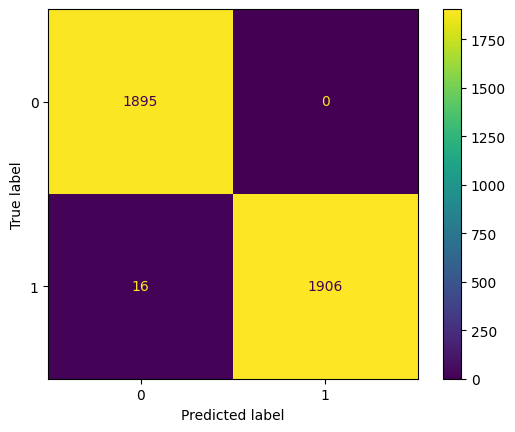

In [73]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_val, rf_pred, labels = rf_cv.best_estimator_.classes_)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_cv.best_estimator_.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
cm_display.plot(values_format = 'd')

# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.
<br> </br>

**Note:** In other labs there was a custom-written function to extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. You can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [81]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
from sklearn.metrics import classification_report

rf_results = classification_report(y_val, rf_pred, output_dict = True, zero_division = 0)
models_results = pd.DataFrame(rf_results).T
models_results

,precision,recall,f1-score,support
0,0.991627,1.000000,0.995796,1895.000000
1,1.000000,0.991675,0.995820,1922.000000
accuracy,0.995808,0.995808,0.995808,0.995808
macro avg,0.995814,0.995838,0.995808,3817.000000
weighted avg,0.995843,0.995808,0.995808,3817.000000


**Question:** What does your classification report show? What does the confusion matrix indicate?

The classification report of the RandomForest results along with the confusion matrix helps confirm the metrics used to evaluated the model. A very high recall score which tells us the model classified almost all Real Positives as Positives, with very few False Negatives. Also, the model didn't missclassify any Real Negative.

#### **XGBoost**

Now, evaluate the XGBoost model on the validation set.

In [82]:
# Use the best estimator to predict on the validation data
### YOUR CODE HERE ###
xgb_pred = xgb_cv.best_estimator_.predict(X_val)

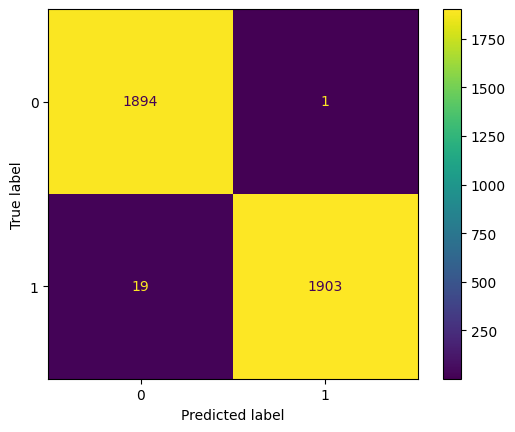

In [83]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
xgb_cm = confusion_matrix(y_val, xgb_pred, labels = xgb_cv.best_estimator_.classes_)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
xgb_cm_display = ConfusionMatrixDisplay(confusion_matrix = xgb_cm, display_labels = xgb_cv.best_estimator_.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
xgb_cm_display.plot(values_format = 'd')

# Display plot
### YOUR CODE HERE ###
plt.show()


In [85]:
# Create a classification report
### YOUR CODE HERE ###
xgb_report = classification_report(y_val, xgb_pred, output_dict = True, zero_division = 0)
xgb_results = pd.DataFrame(xgb_report).T
xgb_results

,precision,recall,f1-score,support
0,0.990068,0.999472,0.994748,1895.00000
1,0.999475,0.990114,0.994773,1922.00000
accuracy,0.994760,0.994760,0.994760,0.99476
macro avg,0.994771,0.994793,0.994760,3817.00000
weighted avg,0.994805,0.994760,0.994760,3817.00000


**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The XGBoost model performed really well on the validation data as well, but RandomForest performed just slightly better than the XGBoost model in every metric. So it is safe to assume the RandomForest model has better performance.

### **Use champion model to predict on test data**

In [86]:
### YOUR CODE HERE ###
final_rf_pred = rf_cv.best_estimator_.predict(X_test)

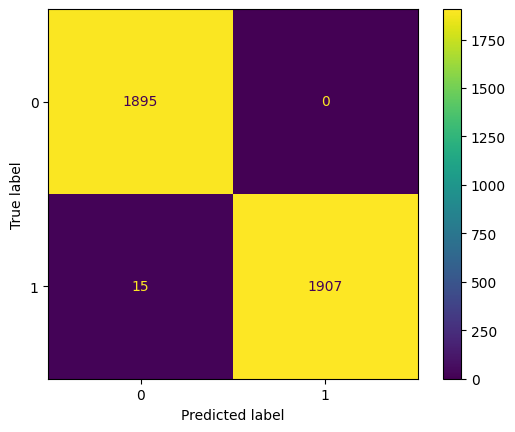

In [87]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
final_cm = confusion_matrix(y_test, final_rf_pred, labels = rf_cv.best_estimator_.classes_)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
final_display = ConfusionMatrixDisplay(confusion_matrix = final_cm, display_labels = rf_cv.best_estimator_.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
final_display.plot(values_format = 'd')

# Display plot
### YOUR CODE HERE ###
plt.show()


#### **Feature importances of champion model**


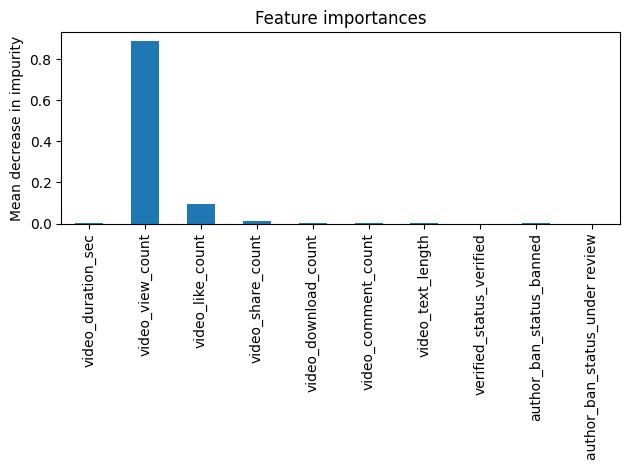

In [97]:
### YOUR CODE HERE ###
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index = X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?

The most predictive features are 'video_view_count', and 'video_like_count'. These are features that we expected to be important predictors of claims and opinions. The analysis on the data revealed these were important features and the model results confirm they are correlated to 'claim_status'.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


I definetly recommend the RandomforestClassifier model achieved a 100% precision score and a 99.1% recall score on validation data, metrics which were sustained and verified on the test data. This is a model that will correctly classify 99% of reports correctly.

The Random Forest Classifier is an ensemble of Decision Trees Classifiers. They are fitted in parallel and their results are aggregated to find the mean, and that mean is the prediction. The ensemble finds the best weights for the model and after it is trained, the model uses the learned weghts to compute predictions on unseen data.

Claim keywords as a feature which would be the words that are associated with claims found in the text transcription, we can transform these words and the transcription of the video and use the keywords columns as target.

A feature that I think will help make a better model is recurrent_claim_user. This feature would tell us if the report was made by a user that makes claims often. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.